In [ ]:
import collections
import networkx as nx
import sys
import os
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [ ]:
graph_collections, graph_name = read_graph("./test-graphs")


In [ ]:
# India   145nodes 187edges #37
# US carrier 158nodes   189edges # 41
# Kentucky    754nodes   895edges # 20
# Albeni  # 0
# Geant  2001 #14
# Bell Canada # 4
# Abvt # 1
# Agis # 2
# 10, 18, 8
# selection__= []
# selection__=[i for i,j in enumerate(graph_name)]
def selection__from_graph(graph_coll,graph_name_list,sel_=[]):
    """_summary_

    Args:
        graph_coll (_type_): _description_
        sel_ (list, optional): _description_. Defaults to [].

    Returns:
        _type_: _description_
    """
    if sel_ !=[]:
        return [(j, graph_coll[k]) for i, j in enumerate(graph_name_list)
                for k in sel_ if i == k]
    else:
        return [(i, j) for i, j in zip(graph_name_list, graph_coll)]


In [ ]:
G = graph_collections[37]
# geo_loc_data = get_geo_data("Internet2LatLong.csv")
geo_loc_data = {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
                for (k, v) in G.nodes(data=True)}
# print(geo_loc_data)
edge_geo_data_combined = assign_location(G, geo_loc_data)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)


In [ ]:
selection__= [37,41,20,0,14,4,1,2,10, 18, 8]

gGrahps = selection__from_graph(graph_collections, graph_name, selection__)

# print(gGrahps)

geo_loc_data_sample = {i: {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
     for (k, v) in g.nodes(data=True)} for i, g in gGrahps}
# print(geo_loc_data_sample)

edge_geo_data_sample = {k: assign_location(u, v) for (k, v), (j,u) in zip(geo_loc_data_sample.items(), gGrahps)}
# print(geo_loc_data_sample)



# print()
# # edge_geo_data_combined_sample = {k: assign_location(g, v) for (k, v), g in zip(geo_loc_data_all.items(), graph_collections)}


In [ ]:
weight_sum =sum([sum(hub_information(G, i, 2))
     for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))])
node_strength_2_deg = [(i, sum(hub_information(G, i, 2)))  # /weight_sum
                       for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
degree__ = [(i, len(n_neighbor(G, i, 1))) for (i, j) in sorted(list(G.degree()),
                                                               key=lambda item: int(item[0]))]


In [ ]:

source_1, source_2, source_3, source_4, *others = degree__, node_strength_2_deg, eccentricity(G),  approximate_current_flow_betweenness_centrality(G, weight="weight"), current_flow_betweenness_centrality(G), betweenness_centrality(G, weight="weight"),  closeness_centrality(G),      load_centrality(
    G),    #eigenvector_centrality(G),

# print(source_2, source_3)


In [ ]:
sources_of_evidences = {
    "Degree": {g[0]: [(i, len(n_neighbor(g[1], i, 1))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Node Strength": {g[0]: [(i, sum(hub_information(g[1], i, 2))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Eccentricity": {g[0]: eccentricity(g[1]) for g in gGrahps},
    "Approx Curr. Flow Betwns Cent'y": {g[0]: approximate_current_flow_betweenness_centrality(g[1]) for g in gGrahps}
}
# sources_of_evidences["Degree"]["ABILENE"]

In [ ]:
e_v = 2
varying_examples_multi(source_1, source_2, source_3, source_4,e_v)

In [ ]:
evis = [2,3,4]
selected_nodes_based_on_source ={i:{e: varying_examples_multi(sources_of_evidences["Degree"][i],
sources_of_evidences["Node Strength"][i], 
sources_of_evidences["Eccentricity"][i], 
    sources_of_evidences["Approx Curr. Flow Betwns Cent'y"][i], e) for e in evis} for i, j in gGrahps}

selected_nodes_based_on_source_ext = {k2:{k:len(v) for k,v in v2.items()} for k2,v2 in selected_nodes_based_on_source.items()}

# {i: { "#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "sel_":v} for (i,j), v in zip(gGrahps, selected_nodes_based_on_source.values())}
sel_node_summary={i: {"#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "Diameter":nx.diameter(j), "Density":nx.density(j)}for (i, j)in gGrahps }
sel_to_table = {
    i: (sel_node_summary[i] | selected_nodes_based_on_source_ext[i]) for i, j in gGrahps}
    


In [ ]:
pd.DataFrame.from_dict(
    sel_to_table, orient='index')
# print()


In [ ]:
selected_nodes_based_on_source["ABILENE"]
# {i:{varying_examples_multi(j,v2) for i,j in gGrahps for v2 in v} for v in selected_nodes_based_on_source.values()}
# varying_examples_multi(j)
# cluster_optimal_nodes()
# selected_nodes_based_on_source["BELLCANADA"][4]
# sel_error ={k2: {k: cluster_optimal_nodes(j, v) for k, v in v2.items() for i, j in gGrahps if {i, k2} } for k2, v2 in selected_nodes_based_on_source.items()}
clusters__ = {
    k2: {
        k: cluster_optimal_nodes_test(j, v) for k, v in v2.items()
        }  
        for (i, j), (k2, v2) in zip(
            tqdm(gGrahps), tqdm(selected_nodes_based_on_source.items())
            )
            }

# clusters__ = {
#     k2:{
#         k: cluster_optimal_nodes_test(j, v) for k, v in v2.items()
#     }
#     for (i, j), (k2, v2) in zip(
#         tqdm(gGrahps), 
#         tqdm(selected_nodes_based_on_source.items())
#     )
# }


In [ ]:
# gGrahps[0][1]
cluster_optimal_nodes(gGrahps[0][1], selected_nodes_based_on_source["ABILENE"][2])


In [ ]:
[{x:cluster_optimal_nodes_test(
    gGrahps[1][1], selected_nodes_based_on_source["ABILENE"][x])}for x in [2, 3, 4]]


In [ ]:

clusters__dict = { c: {e: {i: set([i]) | j for i, j in f.items()} for e, f in d.items()} for c, d in clusters__.items()}

clusters__pair ={x: {e: {u: k for (k, v) in f.items() for u in v} for e, f in y.items()} for x, y in clusters__dict.items()}
# clusters__pair
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html



In [ ]:

# list(gGrahps[0][1].nodes.data())
# gGrahps[0][1].edges(data=True)


In [ ]:
#Generate 1000 random numbers between 1 and 16777215
max_node_len = max([nx.number_of_nodes(j) for i,j in gGrahps])
color_generator(7)


In [ ]:
t = nx.Graph()
t.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in t.nodes()]
# 
print(values)
#  node_color=values,
nx.draw(t, cmap=plt.get_cmap('viridis'), with_labels=True, font_color='white')
plt.show()


In [ ]:
[nodes for nodes in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('viridis'), with_labels=True, font_color='white')


In [ ]:
f = nx.path_graph(3)
bb = nx.betweenness_centrality(f)
print(bb)
isinstance(bb, dict)
# True
nx.set_node_attributes(f, bb, "betweenness")
f.nodes[1]["betweenness"]
# 1.0

In [ ]:
# clusters__pair
# gGrahps[8]


In [ ]:
G = graph_collections[1]
__rand = nx.number_of_nodes(G)


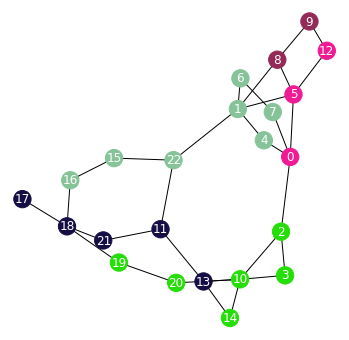

{'1': {'22', '4', '6', '16', '15', '7'}, '5': {'12', '0'}, '8': {'9'}, '11': {'21', '17', '13', '18'}, '10': {'19', '2', '20', '3', '14'}}
None


In [66]:
kdl_cluster_2 = clusters__pair["ABVT"][4]
nx.set_node_attributes(G, kdl_cluster_2, "2 Sources")
list(G.nodes().data())

opti_n_maps = {node: j['2 Sources'] for node, j in G.nodes().data()}
# print(opti_n_maps)
# print(nx.number_of_nodes(G))
random_cols = color_generator(__rand)
# random_cols = {node:get_random_hex() for node in G.nodes()}
# print(random_cols)
{(k,v,k1,v1) for (k,v),(k1,v1) in zip(random_cols.items(),opti_n_maps.items())}
values = [val_map.get(node, 0.25) for node in t.nodes()]
values = [random_cols.get(v, "#000000") for k, v in opti_n_maps.items() ]
#  node_color=values,
# print(values)
fig, ax = plt.subplots(1, figsize=(6, 6))
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
# ax.legend(scatterpoints=1)
plt.show()
print(print(cluster_optimal_nodes_test(
        gGrahps[1][1], selected_nodes_based_on_source["ABVT"][4]))
)


In [69]:
{node: j.get(j["Latitude"], 0.0) for node, j in G.nodes(data=True) }


KeyError: 'Latitude'

In [65]:
[(node, data) for node, data in G.nodes(data=True)]

[('0',
  {'Internal': 1,
   'Latitude': 38.89511,
   'Country': 'United States',
   'id': 0,
   'Longitude': -77.03637,
   'label': 'Washington CDC',
   '2 Sources': '5'}),
 ('1',
  {'Internal': 1,
   'Latitude': 40.71427,
   'Country': 'United States',
   'id': 1,
   'Longitude': -74.00597,
   'label': 'New York',
   '2 Sources': '1'}),
 ('2',
  {'Internal': 1,
   'Latitude': 33.749,
   'Country': 'United States',
   'id': 2,
   'Longitude': -84.38798,
   'label': 'Atlanta',
   '2 Sources': '10'}),
 ('3',
  {'Internal': 1,
   'Latitude': 25.77427,
   'Country': 'United States',
   'id': 3,
   'Longitude': -80.19366,
   'label': 'Miami',
   '2 Sources': '10'}),
 ('4',
  {'Internal': 1,
   'Latitude': 42.35843,
   'Country': 'United States',
   'id': 4,
   'Longitude': -71.05977,
   'label': 'Boston',
   '2 Sources': '1'}),
 ('5',
  {'Internal': 1,
   'Latitude': 51.50853,
   'Country': 'United Kingdom',
   'id': 5,
   'Longitude': -0.12574,
   'label': 'London',
   '2 Sources': '5'}),
